## 0. Data Ingestion, Premliminary Data Analysis

In [53]:
#import ncessary libaries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [54]:
# load dataset through url
train_url = "https://raw.githubusercontent.com/ek-chris/Practice_datasets/refs/heads/main/home_loan_train.csv"

test_url = "https://raw.githubusercontent.com/ek-chris/Practice_datasets/refs/heads/main/home_loan_test.csv"


df_train = pd.read_csv(train_url)
df_test = pd.read_csv(test_url)

URLError: <urlopen error [Errno 11001] getaddrinfo failed>

In [ ]:
# create a copy of the dataset
df_copy = df_train.copy()

In [ ]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
# set loant_id as inndex
df_train.set_index("Loan_ID", inplace=True)

In [ ]:
# check the column names
df_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
# check the  basic information of the dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
# check for missing values
df_train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
# handle missing values in numerical columns

 # extracts numerical columns
num_cols = df_train.select_dtypes(include=["float64","int64"]).columns 

# check for missing values
df_train[num_cols].isna().sum()

# fill the  missing values in numerical columns with median
df_train.loc[:, num_cols] = df_train[num_cols].fillna(df_train[num_cols].median())  

# # recheck for missing values
df_train[num_cols].isna().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

In [ ]:
# # handle missing values in categorical columns

# # extracts categorical column
cat_cols = df_train.select_dtypes(include="object").columns 


# # check for missing values
# df_train[cat_cols].isna().sum()

# get the mode of the columns
modes = df_train[cat_cols].apply(lambda x: x.value_counts().index[0])

# fill the missing values in the catgorical columns with modes
df_train[cat_cols] = df_train[cat_cols].fillna(modes)


# rechecck the missing values
df_train[cat_cols].isna().sum()

Loan_ID          0
Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
Loan_Status      0
dtype: int64

In [ ]:
# check for duplicates
df_train.duplicated().sum()

np.int64(0)

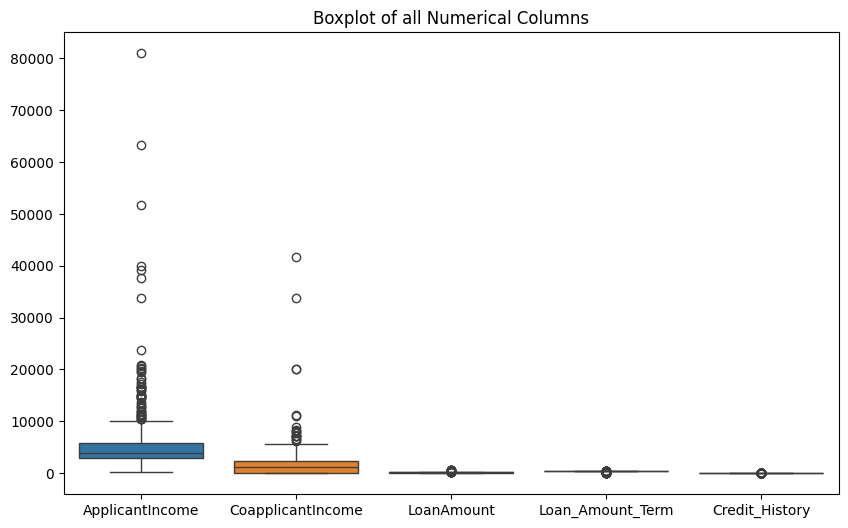

In [ ]:
# check for outliers
plt.figure(figsize=(10,6))
sns.boxplot(data=df_train[num_cols])
plt.title("Boxplot of all Numerical Columns")
plt.show()


In [ ]:
# handle outliers
def handle_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - (1.5 * IQR)
    upper = Q3 - (1.5 * IQR)
    return np.clip(series, lower, upper)

# apply to numerical categorizes
df_train[num_cols] = df_train[num_cols].apply(handle_outliers)

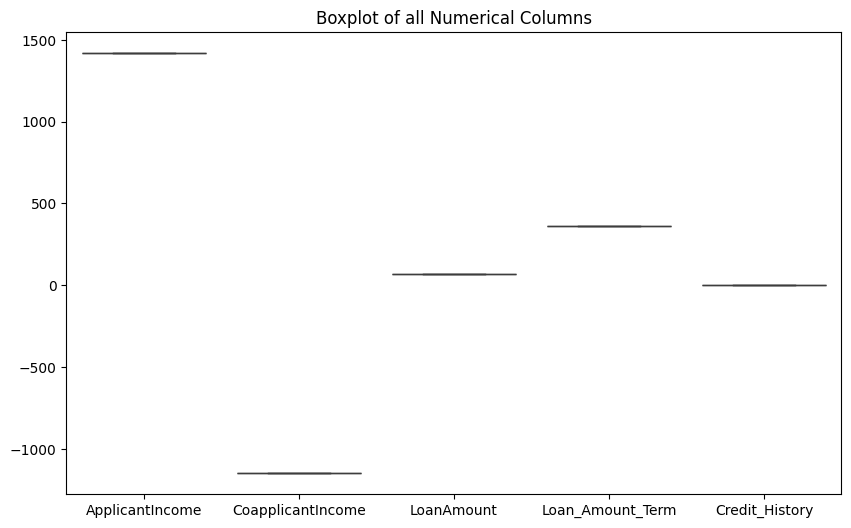

In [ ]:
# recheck for outliers
plt.figure(figsize=(10,6))
sns.boxplot(data=df_train[num_cols])
plt.title("Boxplot of all Numerical Columns")
plt.show()


In [ ]:
# get the descriptive analysis for the numwercal columns
num_cols = df_train.select_dtypes(include=["float64","int64"]).columns
df_train[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


----------------------------------------------------------------
 ### **1. Univariate analysis**
 ---------------------------------------------------------------
 

In [ ]:
def univarte_numerical_eda(df, column):
    """ Performs a univarate EDA on a single numerical column.
    Displays summary statistics, skewness, kurtosis, histogram, KDE, and boxplot.
    """
    
    print(f" Feature: {column}")
    print("="*40)
    print(df[column].describe().to_frame())
    print(f"\nSkewness: {df[column].skew():.3f}")
    print(f"Kurtosis: {df[column].kurt():.3f}")
    
    plt.figure(figsize=(12,4))
    
    # Histogram + KDE
    plt.subplot(1,2,1)
    sns.histplot(df[column], kde=True, bins=30, color="teal")
    plt.title(f"\n Distribution of {column}", fontsize=13)
    plt.xlabel(column)
    plt.ylabel("Frequency")
    
    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=df[column], color="teal")
    plt.title(f"\n Boxplot of {column}", fontsize=13)
    
    plt.tight_layout()
    plt.show()
    
    
      # Optional note on transformation
    if abs(df[column].skew()) > 1:
        print(f"\n {column} is highly skewed. Consider log or Box-Cox transformation.")
    elif abs(df[column].skew()) > 0.5:
        print(f"{column} is moderately skewed.")
    else:
        print(f"{column} is fairly symmetric.")
    

 Feature: ApplicantIncome
       ApplicantIncome
count           614.00
mean           1418.75
std               0.00
min            1418.75
25%            1418.75
50%            1418.75
75%            1418.75
max            1418.75

Skewness: 0.000
Kurtosis: 0.000


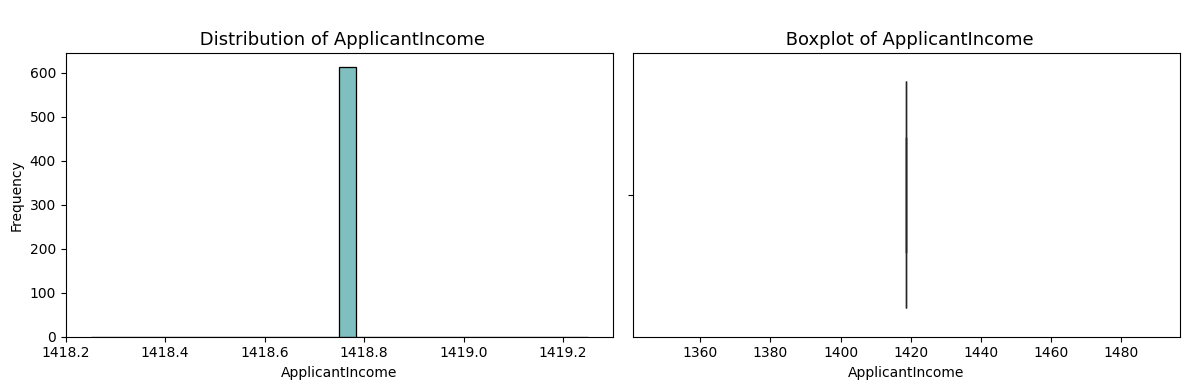

ApplicantIncome is fairly symmetric.
 Feature: CoapplicantIncome
       CoapplicantIncome
count            614.000
mean           -1148.625
std                0.000
min            -1148.625
25%            -1148.625
50%            -1148.625
75%            -1148.625
max            -1148.625

Skewness: 0.000
Kurtosis: 0.000


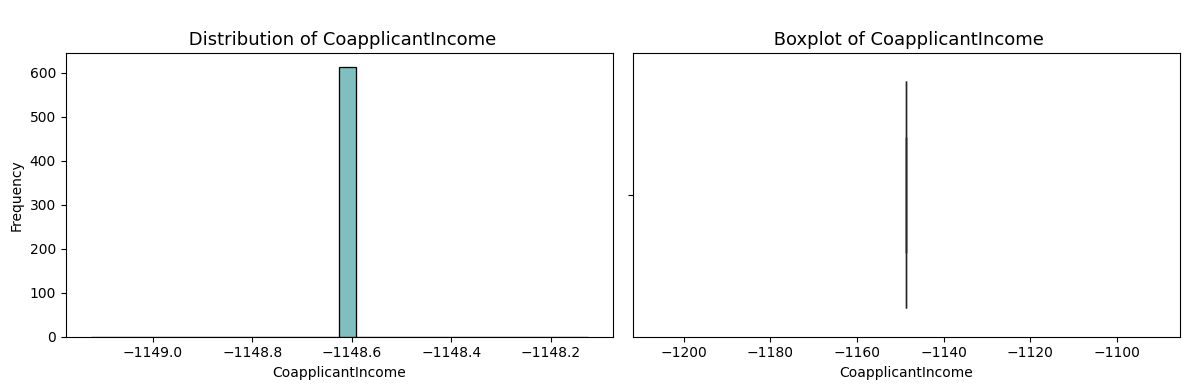

CoapplicantIncome is fairly symmetric.
 Feature: LoanAmount
       LoanAmount
count       614.0
mean         68.0
std           0.0
min          68.0
25%          68.0
50%          68.0
75%          68.0
max          68.0

Skewness: 0.000
Kurtosis: 0.000


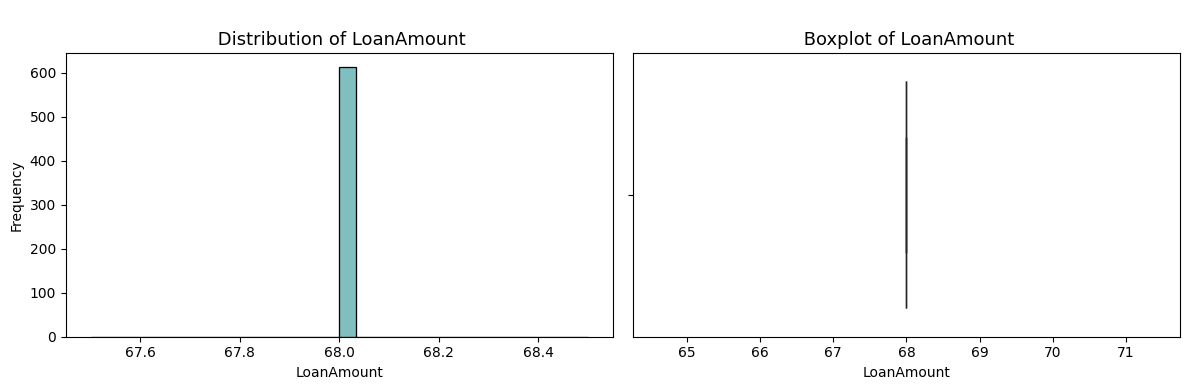

LoanAmount is fairly symmetric.
 Feature: Loan_Amount_Term
       Loan_Amount_Term
count             614.0
mean              360.0
std                 0.0
min               360.0
25%               360.0
50%               360.0
75%               360.0
max               360.0

Skewness: 0.000
Kurtosis: 0.000


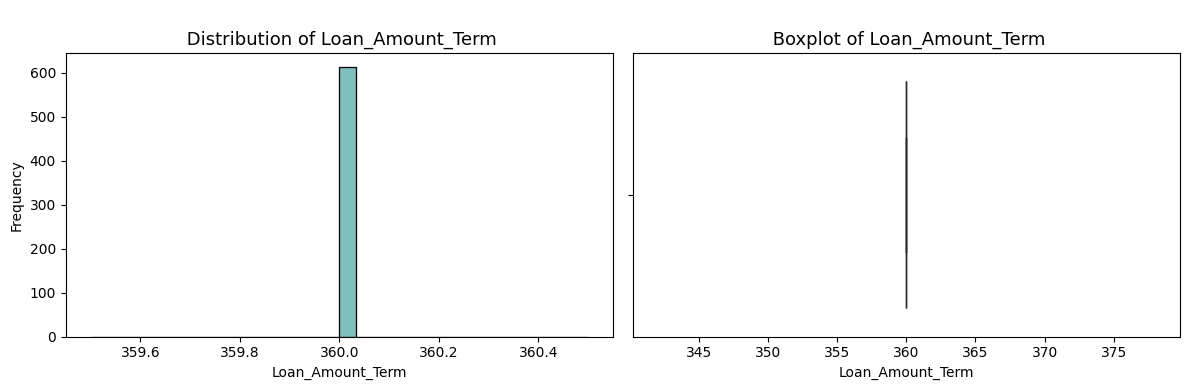

Loan_Amount_Term is fairly symmetric.
 Feature: Credit_History
       Credit_History
count           614.0
mean              1.0
std               0.0
min               1.0
25%               1.0
50%               1.0
75%               1.0
max               1.0

Skewness: 0.000
Kurtosis: 0.000


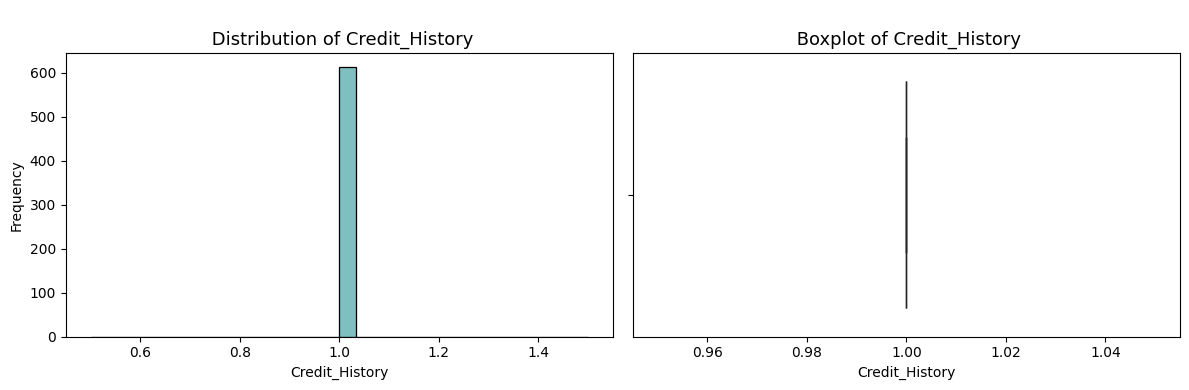

Credit_History is fairly symmetric.


In [ ]:
for col in num_cols:
    univarte_numerical_eda(df_train, col)

In [ ]:
def univaraite_categorical_eda(df, col):
    """Performs univariate EDA on a categorical or ordinal column.
    Displays frequency table, proportion, a countplot and piechat.
    """
    # Frequency + Proportion
    frq = df[col].value_counts()
    prop = df[col].value_counts(normalize=True) * 100
    summary = pd.DataFrame({"Count":frq, "Percentage":prop.round(2)})
    print(summary)
    print()
    
    
    plt.figure(figsize=(8,5))
    # Vizualization: Barchat
    plt.subplot(1,2,1)
    ax = sns.countplot(x=col, data=df, palette="Set2", order=frq.index, color="teal")
    plt.title(f" Distribution(Barchat) of {col}", fontsize=13)
    plt.xlabel(col)
    plt.ylabel("Count")
    
    
    # Piechat
    plt.subplot(1,2,2)
    df[col].value_counts().plot.pie(autopct="%1.1f%%",startangle=90)
    plt.title(f" Distribution(Piechat) of {col}", fontsize=13)
    
    
      # Annotate each bar with percentage
    total = len(df[col])
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2, height + 1,
                f'{(height/total)*100:.1f}%', ha='center')
        
        
    
    plt.tight_layout()
    plt.show()
    
    
    

          Count  Percentage
Loan_ID                    
LP001002      1        0.16
LP001003      1        0.16
LP001005      1        0.16
LP001006      1        0.16
LP001008      1        0.16
...         ...         ...
LP002978      1        0.16
LP002979      1        0.16
LP002983      1        0.16
LP002984      1        0.16
LP002990      1        0.16

[614 rows x 2 columns]



C:\Users\Nababa\AppData\Local\Temp\ipykernel_12844\13757909.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=df, palette="Set2", order=frq.index, color="teal")


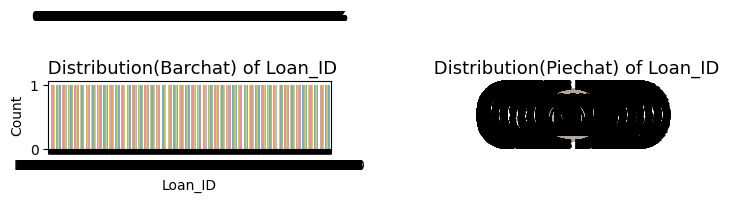

        Count  Percentage
Gender                   
Male      502       81.76
Female    112       18.24



C:\Users\Nababa\AppData\Local\Temp\ipykernel_12844\13757909.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=df, palette="Set2", order=frq.index, color="teal")


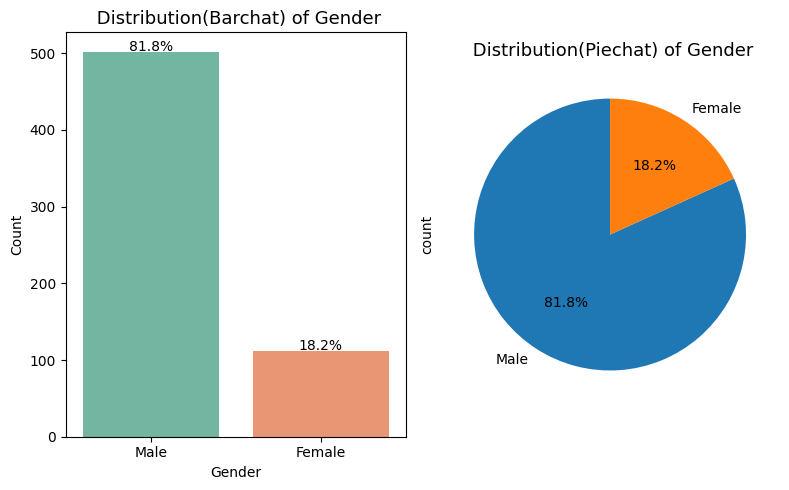

         Count  Percentage
Married                   
Yes        401       65.31
No         213       34.69



C:\Users\Nababa\AppData\Local\Temp\ipykernel_12844\13757909.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=df, palette="Set2", order=frq.index, color="teal")


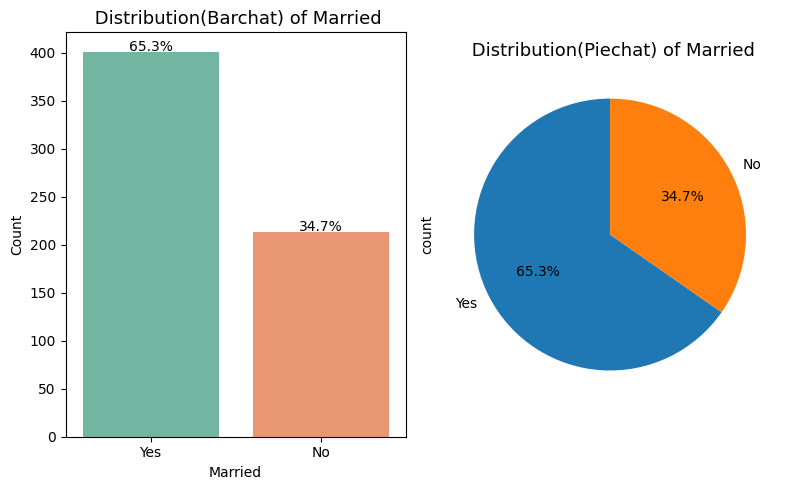

            Count  Percentage
Dependents                   
0             360       58.63
1             102       16.61
2             101       16.45
3+             51        8.31



C:\Users\Nababa\AppData\Local\Temp\ipykernel_12844\13757909.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=df, palette="Set2", order=frq.index, color="teal")


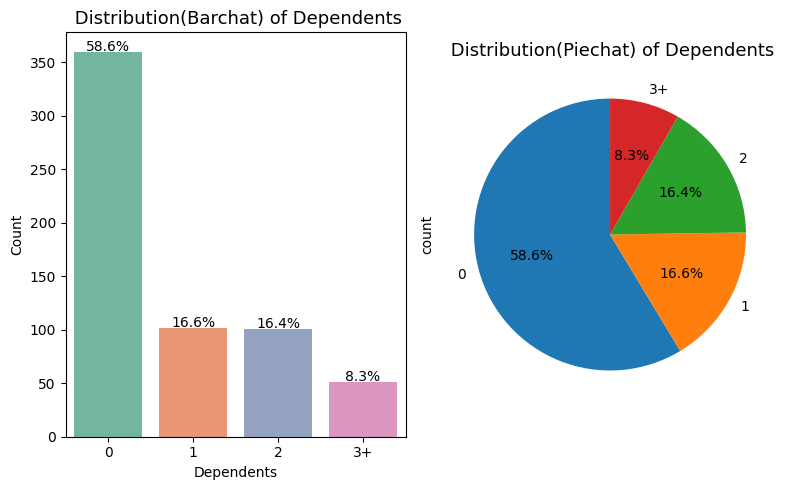

              Count  Percentage
Education                      
Graduate        480       78.18
Not Graduate    134       21.82



C:\Users\Nababa\AppData\Local\Temp\ipykernel_12844\13757909.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=df, palette="Set2", order=frq.index, color="teal")


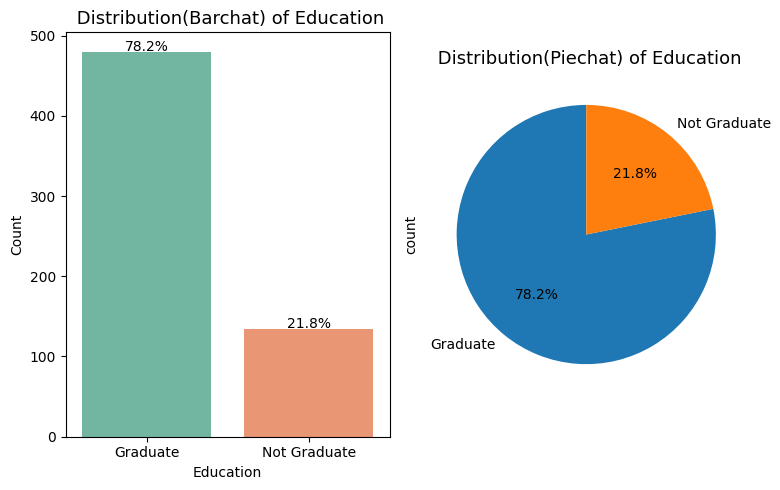

               Count  Percentage
Self_Employed                   
No               532       86.64
Yes               82       13.36



C:\Users\Nababa\AppData\Local\Temp\ipykernel_12844\13757909.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=df, palette="Set2", order=frq.index, color="teal")


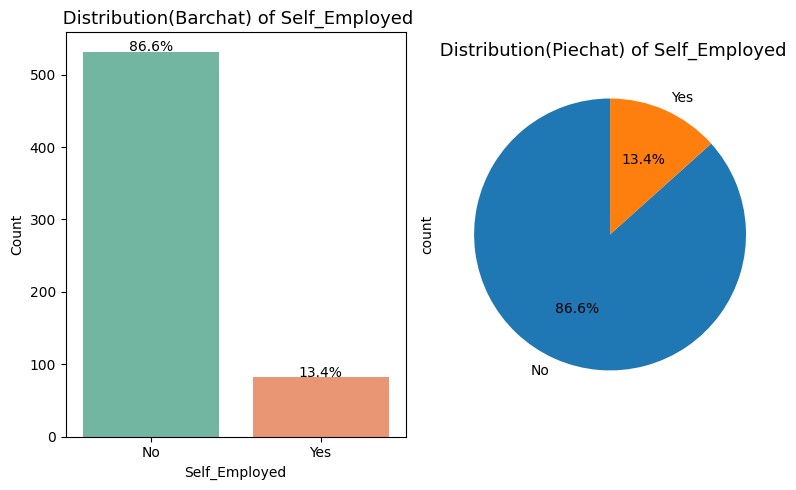

               Count  Percentage
Property_Area                   
Semiurban        233       37.95
Urban            202       32.90
Rural            179       29.15



C:\Users\Nababa\AppData\Local\Temp\ipykernel_12844\13757909.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=df, palette="Set2", order=frq.index, color="teal")


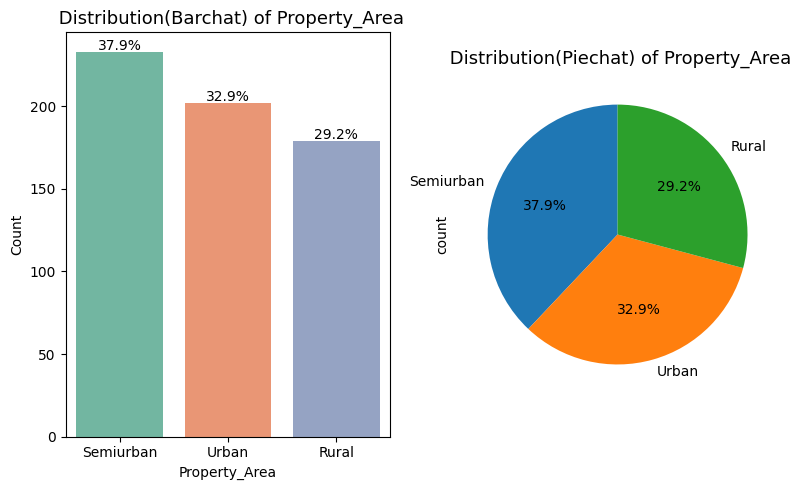

             Count  Percentage
Loan_Status                   
Y              422       68.73
N              192       31.27



C:\Users\Nababa\AppData\Local\Temp\ipykernel_12844\13757909.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=df, palette="Set2", order=frq.index, color="teal")


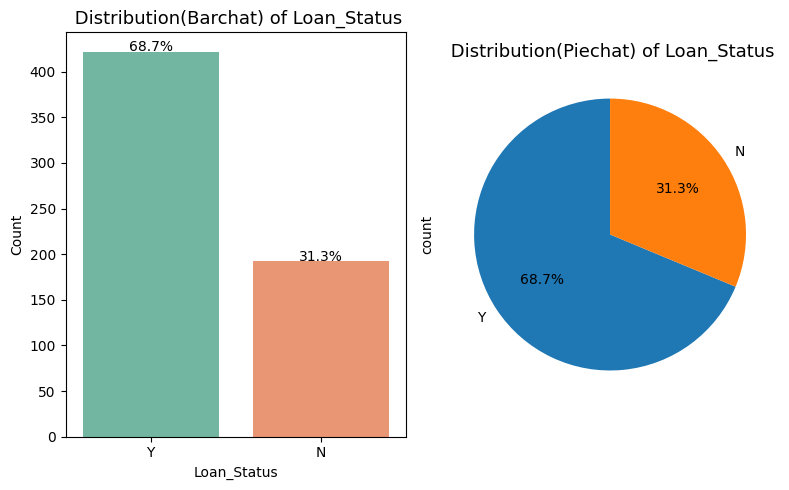

In [ ]:
for col in cat_cols:
    univaraite_categorical_eda(df_train, col)

----------------------------------------------------------------
 ### **2. Bivariate analysis**
 ---------------------------------------------------------------